# Proposing a New Model using XgBoost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, plot_roc_curve, accuracy_score, log_loss, precision_score, \
recall_score, f1_score, precision_recall_curve, auc, classification_report, accuracy_score, plot_confusion_matrix, \
ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
#from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

### Importing Independent Features
Reading the Dataset saved from previous modeling and displaying the first 5 rows

In [2]:
X = pd.read_csv("Input_Features.csv")
X.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533143,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,1,0,0,0,1,0,0,0,1,0
1,1.629107,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,1,0,0,0,1,0,0,0,1,0
2,-0.290177,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,1,0,0,0,1,0,0,0,1,0
3,-0.002284,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,1,0,0,0,1,0,0,0,1,0
4,1.533143,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,1,0,0,0,1,0,0,0,1,0


In [3]:
X.shape

(41176, 52)

### Reading the Target feature and displaying the first 5 rows

In [4]:
Y = pd.read_csv("Target_Feature.csv")
Y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [5]:
Y.shape

(41176, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1, stratify = Y)


### XgBoost

XGBoost hyperparameter tuning by doing a grid search<br>
setting up a parameter grid<br>

In [7]:
#total number of combinations for the set of parameters = 4*3*3*5*3*4*2*3 *5(for 5-fold cross-validation)
params = {
    "max_depth": [3, 4, 5, 7],
    'min_child_weight': [1, 5, 10],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 0.5, 1, 1.5,],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [7,14,21,49],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.5, 0.6, 0.8],
}


### Initialize classifier
https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost <br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html


In [8]:
xgb_cl = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.02,n_estimators=600,silent=True, nthread=1)


### Setting up  stratified folds and grid search Hyperparameters

In [9]:
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

In [10]:
random_search = RandomizedSearchCV(xgb_cl, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001)


In [11]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  3.9min finished


[08:34:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:34:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000022F792B0900>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, mis...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=5, n_jobs=4,
                   p

### print the grid-search results 

In [12]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)



 All results:
{'mean_fit_time': array([36.37333902, 79.20615363, 69.01919937, 62.10179838, 48.21438924]), 'std_fit_time': array([0.45682882, 2.41994544, 1.25248938, 0.80258256, 0.59164293]), 'mean_score_time': array([0.28205164, 0.62109955, 0.53919752, 0.25915901, 0.26186522]), 'std_score_time': array([0.00244362, 0.0047935 , 0.0240706 , 0.04433675, 0.03367614]), 'param_subsample': masked_array(data=[1.0, 0.8, 1.0, 0.8, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_scale_pos_weight': masked_array(data=[7, 49, 14, 21, 7],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_reg_lambda': masked_array(data=[0, 10, 1, 1, 0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 10, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value

In [13]:
def model_eval(tn, fp, fn, tp, target, predictions, prob):
    print("Accuracy = " , round(accuracy_score(target, predictions), 3))
    print("Precision = " ,round(precision_score(target, predictions), 3))
    print("Recall = " ,round(recall_score(target, predictions), 2))
    print("F1 Score = " ,round(f1_score(target, predictions), 2))
    print("false_positive_rate = " , round(fp / (fp + tn), 3))
    print("false_negative_rate = " ,round(fn / (tp + fn),2))
    print("lg_loss = " , round(log_loss(target, prob), 2))


### Default XgBoost model

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)

### XgBoost classifier with default parameters

In [15]:
default_xgb = XGBClassifier()
default_xgb.fit(X_train, y_train)
xgb_predictions = default_xgb.predict(X_test)
xgb_probabilities = default_xgb.predict_proba(X_test)

[08:35:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Generating the confusion matrix for default predictions

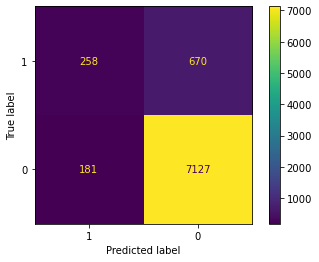

In [16]:
class_labels = [1, 0]
default_xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions, class_labels)

default_xgb_conf_matrix_disp = ConfusionMatrixDisplay(default_xgb_conf_matrix, display_labels=class_labels)
default_xgb_conf_matrix_disp.plot()
plt.grid(False)

### Evaluating default XGBoost model

In [17]:
tn, fp, fn, tp = default_xgb_conf_matrix.ravel()
model_eval(tn, fp, fn, tp, y_test, xgb_predictions, xgb_probabilities)

Accuracy =  0.897
Precision =  0.588
Recall =  0.28
F1 Score =  0.38
false_positive_rate =  0.722
false_negative_rate =  0.02
lg_loss =  0.28


### XgBoost classifier with tuned hyper-parameters

In [18]:
xgb_tuned = XGBClassifier(
                          learning_rate = 0.001,
                          n_estimators = 100,
                          objective='binary:logistic',
                          silent = True, nthread = 1,
                          subsample = 1.0,
                          scale_pos_weight = 8,
                          min_child_weight = 5, 
                          max_depth = 5,
                          gamma = 5, 
                          colsample_bytree = 0.6)

In [19]:
xgb_tuned.fit(X_train, y_train)

[08:35:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:35:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=8,
              silent=True, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [20]:
xgb_tuned_predictions = xgb_tuned.predict(X_test)
xgb_tuned_probabilities = xgb_tuned.predict_proba(X_test)

### Generating the confusion matrix for tuned XgBoost predictions

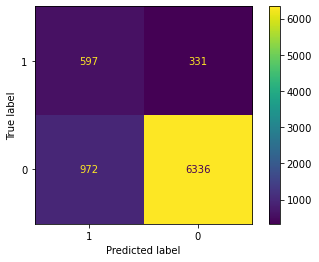

In [21]:
class_labels = [1, 0]
tuned_xgb_conf_matrix = confusion_matrix(y_test, xgb_tuned_predictions, class_labels)

tuned_xgb_conf_matrix_disp = ConfusionMatrixDisplay(tuned_xgb_conf_matrix, display_labels=class_labels)
tuned_xgb_conf_matrix_disp.plot()
plt.grid(False)

### Evaluating tuned XgBoost model

In [22]:
tn, fp, fn, tp = tuned_xgb_conf_matrix.ravel()
model_eval(tn, fp, fn, tp, y_test, xgb_tuned_predictions, xgb_tuned_probabilities)

Accuracy =  0.842
Precision =  0.38
Recall =  0.64
F1 Score =  0.48
false_positive_rate =  0.357
false_negative_rate =  0.13
lg_loss =  0.67


In [23]:
xgb_fpr, xgb_tpr, xgb_thresh = roc_curve(y_test, xgb_probabilities[:,1])
xgb_auc = roc_auc_score(y_test, xgb_probabilities[:,1])

xgb_tuned_fpr, xgb_tuned_tpr, xgb_tuned_thresh = roc_curve(y_test, xgb_tuned_probabilities[:,1])
xgb_tuned_auc = roc_auc_score(y_test, xgb_tuned_probabilities[:,1])

In [24]:
print("ROC_AUC of Default XGB model = " , xgb_auc)


ROC_AUC of Default XGB model =  0.7952104035728442


In [25]:
print("ROC_AUC of tuned XGB model = " , xgb_tuned_auc)

ROC_AUC of tuned XGB model =  0.8063653671932507
